In [ ]:
!pip install arch

In [ ]:
!pip install onnx
!pip install skl2onnx

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from arch.unitroot import PhillipsPerron , ADF , KPSS

In [84]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import DoubleTensorType
from sys import argv

In [54]:
csv = pd.read_csv("/enter/your/path/here")

In [ ]:
csv["Target"] = csv["Close"].shift(-15)
csv.dropna(axis=0,inplace=True)

In [55]:
csv

Open     High      Low    Close     MA 20     RSI 60      CCI 10  \
0      1.07787  1.07788  1.07780  1.07780  1.077593  50.265435   95.363080   
1      1.07761  1.07790  1.07761  1.07788  1.077571  51.165438  165.200391   
2      1.07779  1.07786  1.07760  1.07762  1.077539  48.201452   84.425036   
3      1.07756  1.07780  1.07755  1.07779  1.077530  50.158820  239.024390   
4      1.07751  1.07756  1.07739  1.07756  1.077503  47.312390  114.124294   
...        ...      ...      ...      ...       ...        ...         ...   
89995  1.07259  1.07262  1.07254  1.07255  1.072499  44.173679  100.000000   
89996  1.07251  1.07258  1.07251  1.07258  1.072494  44.483787  155.555555   
89997  1.07239  1.07252  1.07236  1.07251  1.072485  43.574922  107.246377   
89998  1.07238  1.07240  1.07235  1.07240  1.072482  42.110471  -28.273810   
89999  1.07243  1.07245  1.07237  1.07238  1.072491  41.840597  -64.052288   

                 AO    Target  
0      1.423530e-04  1.000288  
1      7.432350e-05  1.000390  
2     -5.290000e-07  1.000148  
3     -6.497060e-05  1.000223  
4     -1.100000e-04  0.999991  
...             ...       ...  
89995 -1.882350e-05  0.000000  
89996 -4.505880e-05  0.000000  
89997 -7.720590e-05  0.000000  
89998 -1.005000e-04  0.000000  
89999 -1.086470e-04  0.000000  

[90000 rows x 9 columns]

In [56]:
csv = csv.loc[0:89984,:]
csv

Open     High      Low    Close     MA 20     RSI 60      CCI 10  \
0      1.07787  1.07788  1.07780  1.07780  1.077593  50.265435   95.363080   
1      1.07761  1.07790  1.07761  1.07788  1.077571  51.165438  165.200391   
2      1.07779  1.07786  1.07760  1.07762  1.077539  48.201452   84.425036   
3      1.07756  1.07780  1.07755  1.07779  1.077530  50.158820  239.024390   
4      1.07751  1.07756  1.07739  1.07756  1.077503  47.312390  114.124294   
...        ...      ...      ...      ...       ...        ...         ...   
89980  1.07222  1.07231  1.07220  1.07230  1.072421  42.306700 -102.564103   
89981  1.07233  1.07234  1.07223  1.07225  1.072434  41.577056 -212.389381   
89982  1.07239  1.07239  1.07235  1.07235  1.072453  42.637551 -111.111111   
89983  1.07242  1.07246  1.07239  1.07240  1.072464  43.179051  -55.330634   
89984  1.07249  1.07250  1.07241  1.07241  1.072471  43.287169  -52.016985   

                 AO    Target  
0      1.423530e-04  1.000288  
1      7.432350e-05  1.000390  
2     -5.290000e-07  1.000148  
3     -6.497060e-05  1.000223  
4     -1.100000e-04  0.999991  
...             ...       ...  
89980 -1.008240e-04  0.999767  
89981 -7.017650e-05  0.999692  
89982 -4.850000e-05  0.999851  
89983 -4.705880e-05  1.000000  
89984 -6.035290e-05  1.000028  

[89985 rows x 9 columns]

In [57]:
train = np.arange(0,20000)
test = np.arange(20020,89984)

In [58]:
ols = sm.OLS(csv.loc[:,"Target"],csv.loc[:,["Open","High","Low","Close","MA 20","RSI 60","CCI 10","AO"]])
lm = ols.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.438e+08
Date:                Mon, 05 Feb 2024   Prob (F-statistic):                        0.00
Time:                        09:23:57   Log-Likelihood:                      2.9776e+05
No. Observations:               89985   AIC:                                 -5.955e+05
Df Residuals:                   89977   BIC:                                 -5.954e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [59]:
ols = sm.OLS(csv.loc[:,"Target"],csv.loc[:,["High","Low","Close","MA 20","AO"]])
lm = ols.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Target   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.298e+08
Date:                Mon, 05 Feb 2024   Prob (F-statistic):                        0.00
Time:                        09:24:58   Log-Likelihood:                      2.9771e+05
No. Observations:               89985   AIC:                                 -5.954e+05
Df Residuals:                   89980   BIC:                                 -5.954e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
predictors = ["High","Low","Close","MA 20","AO"]

In [62]:
lm = LinearRegression()
lm.fit(csv.loc[train[0]:train[-1],predictors],csv.loc[train[0]:train[-1],"Target"])

LinearRegression()

In [63]:
residuals = csv.loc[test[0]:test[-1],"Target"] - lm.predict(csv.loc[test[0]:test[-1],predictors])

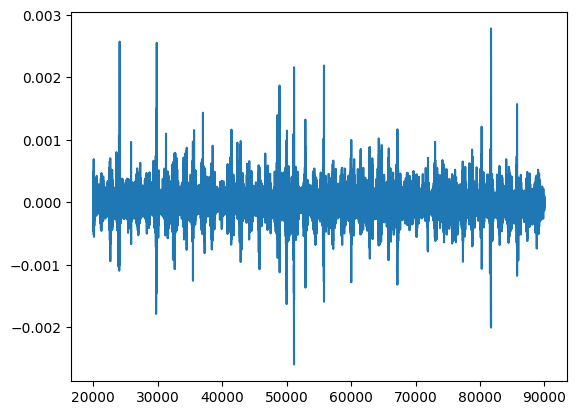

In [64]:
plt.plot(residuals)

In [65]:
pp = PhillipsPerron(residuals)

In [66]:
pp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
     Phillips-Perron Test (Z-tau)    
=====================================
Test Statistic                -73.916
P-value                         0.000
Lags                               62
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
"""

In [67]:
adf = ADF(residuals)

In [68]:
adf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
   Augmented Dickey-Fuller Results   
=====================================
Test Statistic                -31.300
P-value                         0.000
Lags                               60
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
"""

In [69]:
kpss = KPSS(residuals)

In [70]:
kpss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
    KPSS Stationarity Test Results   
=====================================
Test Statistic                 11.078
P-value                         0.000
Lags                               41
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
"""

In [73]:
predictions = lm.predict(csv.loc[test[0]:test[-1],predictors])

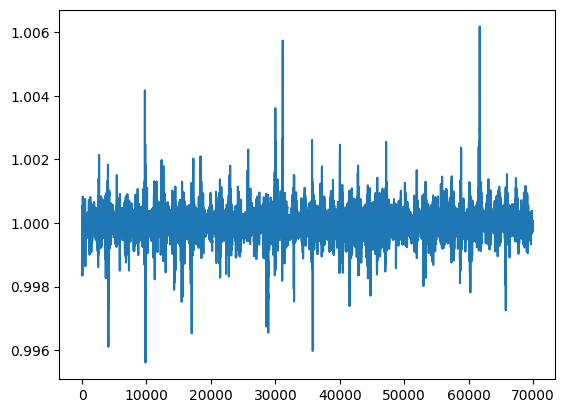

In [74]:
plt.plot(predictions)

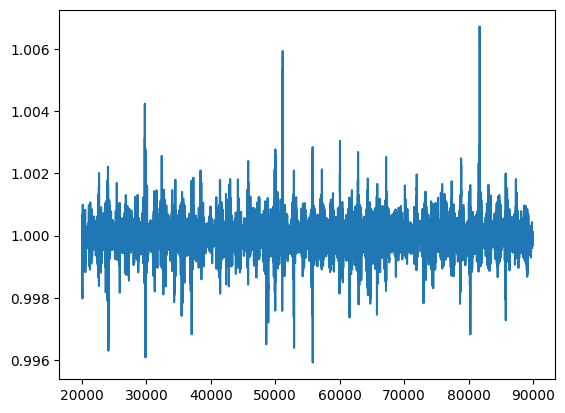

In [75]:
plt.plot(csv.loc[test[0]:test[-1],"Target"])

In [76]:
mean_squared_error(csv.loc[test[0]:test[-1],"Target"],predictions)

3.034987033396043e-08

In [85]:
initial_type_double = [('double_input', DoubleTensorType([None, csv.loc[:,predictors].shape[1]]))]

In [86]:
onnx_model_double = convert_sklearn(lm, initial_types=initial_type_double, target_opset=12)

In [87]:
onnx_model_filename = "EURUSD_ONNX"

In [88]:
onnx_filename=onnx_model_filename+"_Double.onnx"
onnx.save_model(onnx_model_double, onnx_filename)